In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [3]:
X = 6 * np.random.rand(200,1) - 3

y = 0.8 * X ** 2 + 0.9 * X + 2 + np.random.rand(200,1)

# y = 0.8x^2 + .9x + 2

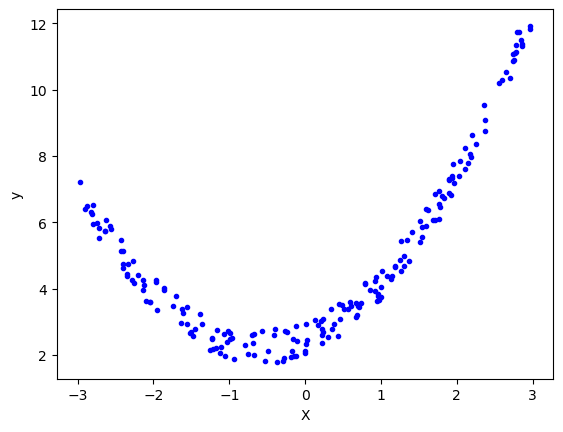

In [4]:
plt.plot(X,y, 'b.')
plt.xlabel('X')
plt.ylabel('y');

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [6]:
# First applying Linear Regression

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = lr.predict(X_test)

In [9]:
r2_score(y_test, y_pred)

0.1536754285095191

In [10]:
# we can compare our results with the actual line
lr.coef_, lr.intercept_

(array([[0.92864015]]), array([4.8590189]))

In [11]:
# Here coefficient of x is almost same but cannot recognize the coefficient of X^2
# also the intercept value is around 2 and it's coming around as 5 in our model

''

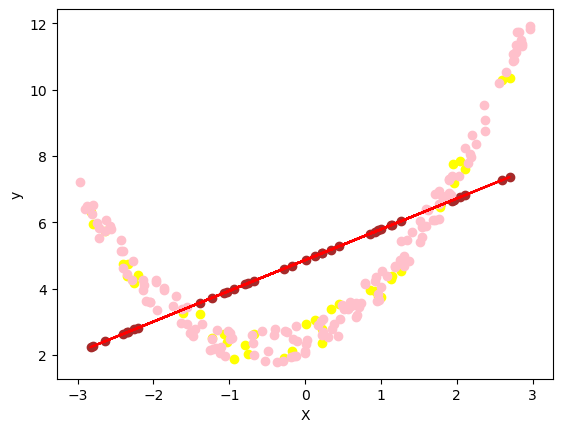

In [12]:
# plt.plot(X,y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X_test, y_pred, color='red')
plt.scatter(X_test, y_pred, color='brown')
plt.scatter(X_test, y_test, color='yellow')
plt.scatter(X_train, y_train, color='pink')
;

In [13]:
# Now doing it with Polynomial regression

In [14]:
# in polynomial regression we add a degree
# let's say the degree is 2
# it means that now the equation of best line becomes if it is a linear regressin as 
# yb = bo + b1*X + b2*X^2

# if there are more than one input feature and degree is 2 then best fit line is
# yb = bo + b1*X1 + b2*X1^2
#         + b3*X2 + b4*x2^2

In [15]:
poly = PolynomialFeatures(degree=2)

In [16]:
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [17]:
print(X_train_trans[0])
print(X_train[0])

[1.         1.69107761 2.85974348]
[1.69107761]


In [18]:
# now applying linear regression on transformed X_train data

In [19]:
lr2 = LinearRegression()
lr2.fit(X_train_trans, y_train)

LinearRegression()

In [20]:
y_pred2 = lr2.predict(X_test_trans)

In [21]:
r2_score(y_test, y_pred2)

0.9814150504538243

In [22]:
print(lr2.coef_)
print(lr2.intercept_)

[[0.         0.89915107 0.80163577]]
[2.48290268]


In [23]:
# here the equation is coming out as 
# y = 0.88x^2 + 0.8x + 2